# Feature spaces, Linear Algebra, Numeric data methods, Linear Regression
https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/08-Class_exercise.md
#### Part 1
1. Feature space from csv file. Read `data/ds_salaries.csv` into a pandas dataframe
2. Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".
3. Onehot encode "experience_level". Hint: look up pandas: `get_dummies()` method.
4. labelencode "company_location" 
5. Normalize the company_location number (relative value between 0-1) ![](https://cdn-images-1.medium.com/max/253/1*Dl3P3Rrzto258X0Ales9Xw.png)
6. Make binning of the salary column (both cut and qcut methods).
7. Make a barplot with binned salaries to show the company size count for each of the bins. Like this: 

<img src="../../images/binned_salaries.jpg" width=300/>

Hint: Use pandas Series unstack() method to get a dataframe from a multiindex Series object (The result of making a groupby count on both salary_bins and company_size columns

In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

#--Feature space from csv file. Read data/ds_salaries.csv into a pandas dataframe
data = pd.read_csv("../../data/ds_salaries.csv") 
# data
#--Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".
data[["work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size"]]
# print(data)

#--Onehot encode "experience_level". Hint: look up pandas: get_dummies() method.
gd = pd.get_dummies(data, columns = ["experience_level"])
#gd

#--labelencode "company_location" 
le = preprocessing.LabelEncoder()
data["company_location"] = le.fit_transform(data["company_location"])
#data

#--Normalize the company_location number (relative value between 0-1) 
def NormalizeData(myData):
    return (myData - np.min(myData)) / (np.max(myData) - np.min(myData))

#NormalizeData(data["company_location"])


#Make binning of the salary column (both cut and qcut methods).
data['salary check'] = pd.cut(data['salary'], bins=4)
#data

results = pd.qcut(data['salary'], q=[0, .2, .4, .6, .8, 1], retbins=True)
#results

#--Make a barplot with binned salaries to show the company size count for each of the bins. Like this:
data.plot(kind='hist')

data.groupby(['salary', 'company_size'])
dataStack = data.unstack(level=1)
#data

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

#### Part 2
8. Make it into a function that can take either company_size or experience_level as arguments.
9. Change the experience_level column to be numeric using this dictionary: `experience = {'EN':10,'EX':20,'MI':30,'SE':40}`. Hint: [Here](https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/).
10. Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary
11. scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd
12. Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.

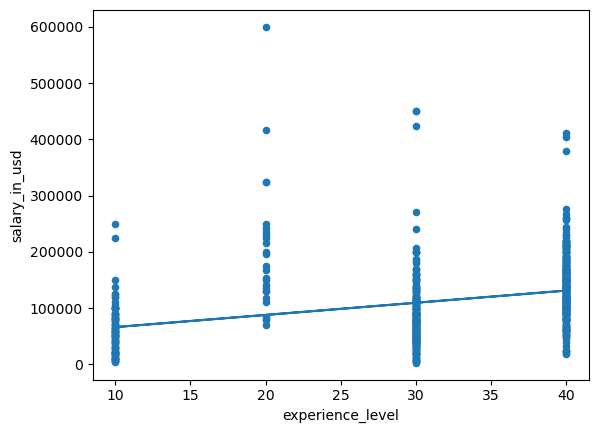

In [22]:
#Make it into a function that can take either company_size or experience_level as arguments.
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_csv("../../data/ds_salaries.csv") 

def data_plot(input: str):
    if input == "company_size" or input == "experience_level":
        data["salary_cut"] = pd.qcut(data["salary_in_usd"], 4, 
        labels=["bin_low", "bin_medium", "bin_high", "bin_extra"])
        grouped_data = data.groupby(["salary_cut", input]).size()
        unstacked = grouped_data.unstack()
        
        return unstacked
    return -1

# data_plot("company_size").plot.bar()
# data_plot("experience_level").plot.bar()
        
#Change the experience_level column to be numeric using this dictionary: experience = {'EN':10,'EX':20,'MI':30,'SE':40}. Hint: Here.
experience = {"EN": 10, "EX": 20, "MI": 30, "SE": 40}
data.replace({"experience_level": experience}, inplace=True)
# print(data)

#Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary
# sns.pairplot(data, vars=data.columns[[2,7]])

#scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd
# data.plot.scatter(x=2, y=7)
# data[data.columns[[2,7]]].corr()

#Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.
xs = data[["experience_level"]]
ys = data[["salary_in_usd"]]

model = LinearRegression()
model.fit(xs, ys)

y_pred = model.predict(xs)

data.plot.scatter(x=2, y=7)
plt.plot(xs, y_pred)

## Part 3: Linear Algebra
Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.
```python
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}
```
Hint: you can use pandas and Transpose to create dataframe: `pd.DataFrame(shoppers).T` to get the necessary shape of the dataframe/matrix. Also use df.to_numpy() to changes a Pandas DataFrame df into a numpy ndarray with only the numeric data

In [5]:
import pandas as pd
import numpy as np

shoppers = {
    'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
    'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
    'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
    'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}

shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}

shopperData = pd.DataFrame(shoppers).T #T turns the table??
shopperDataNp = shopperData.to_numpy()

shop_pricesData = pd.DataFrame(shop_prices)
shop_pricesDataNp = shop_pricesData.to_numpy()

r = shopperDataNp.dot(shop_pricesDataNp)
r2 = shopperData.dot(shop_pricesData)

# print(r1)
print(r2)

prices_netto = (4 * 10.50 + 2 * 2.25 + 3 * 4.50 + 2 * 33.50)
prices_fakta = (4 * 4 + 2 * 4.50 + 3 * 6.25 + 2 * 20.00)

print(f"Netto price test: {prices_netto}")
print(f"Fakta price test: {prices_fakta}")

          Netto   Fakta
Paula    127.00   83.75
Peter    166.25  110.50
Pandora  244.75  158.50
Pietro   102.50  116.25
Netto price test: 127.0
Fakta price test: 83.75
